In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read inhttp://localhost:8888/edit/Desktop/movies.csv the data
df = pd.read_csv(r'/Users/nikhilpatel/Downloads/movies.csv')

In [2]:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df = df.dropna()

In [5]:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())

print(percent_missing)

0.0


In [6]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
df['budget'].astype('int64')
df['gross'].astype('int64')

0        46998772
1        58853106
2       538375067
3        83453539
4        39846344
          ...    
7648    426505244
7649    319715683
7650    245487753
7651    111105497
7652    461421559
Name: gross, Length: 5421, dtype: int64

In [10]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df.head()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [12]:
df.drop('year', axis=1)
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [13]:
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


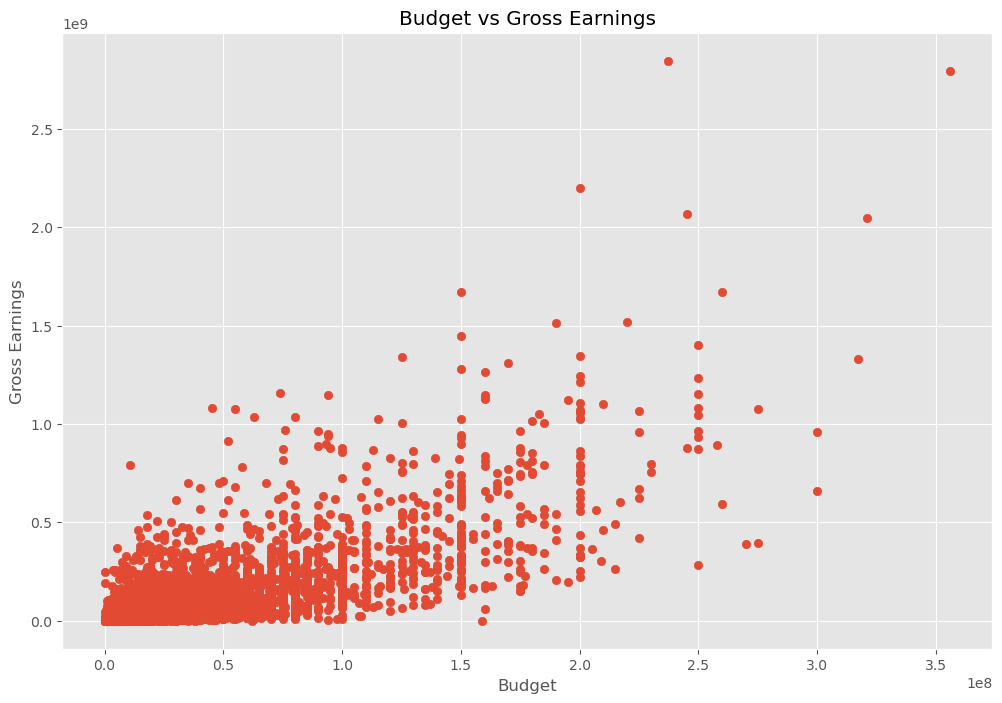

In [14]:
#Correlation between budget and gross

plt.scatter(x = df['budget'], y = df['gross'])
plt.title("Budget vs Gross Earnings")
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

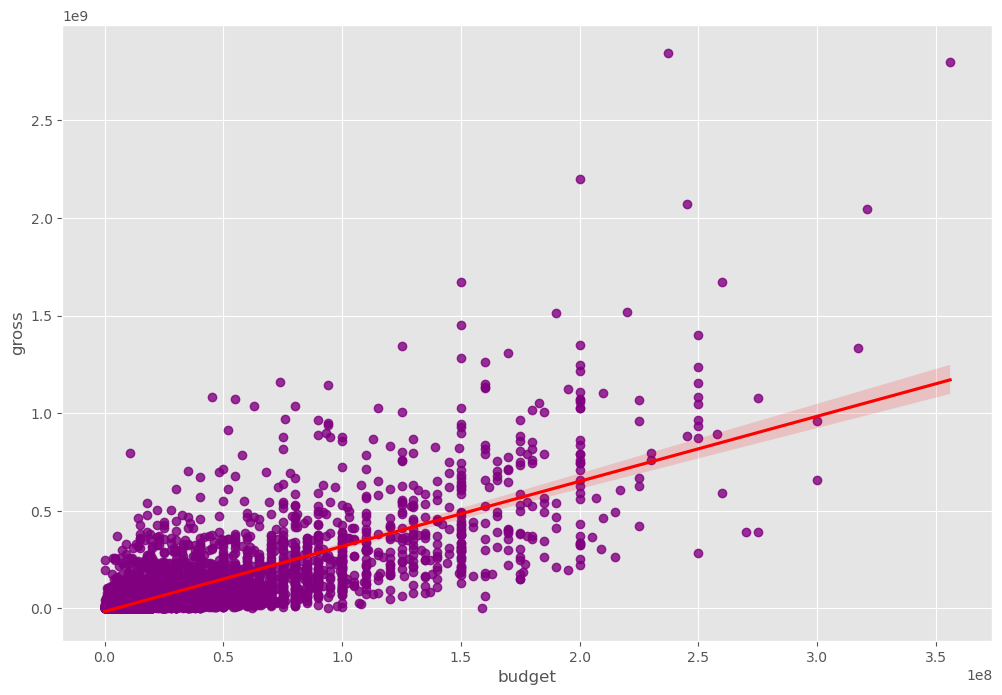

In [16]:
sns.regplot(x= 'budget', y = 'gross', data = df, scatter_kws = {"color": 'purple'}, line_kws = {'color': 'red'})

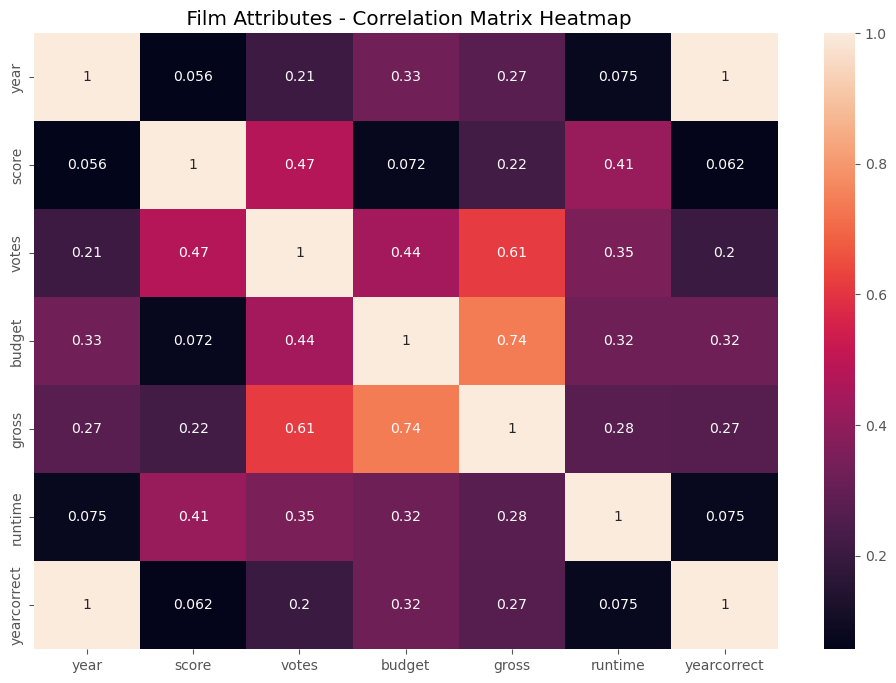

In [17]:
corr_matrix = df.corr(method='pearson')
sns.heatmap(corr_matrix, annot = True)
plt.title(" Film Attributes - Correlation Matrix Heatmap")

plt.show()

In [18]:
corr_matrix = df.corr(method='pearson')
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

year         score          0.056386
score        year           0.056386
yearcorrect  score          0.061923
score        yearcorrect    0.061923
             budget         0.072001
budget       score          0.072001
runtime      year           0.075077
year         runtime        0.075077
yearcorrect  runtime        0.075294
runtime      yearcorrect    0.075294
yearcorrect  votes          0.203098
votes        yearcorrect    0.203098
             year           0.206021
year         votes          0.206021
gross        score          0.222556
score        gross          0.222556
gross        yearcorrect    0.268721
yearcorrect  gross          0.268721
year         gross          0.274321
gross        year           0.274321
runtime      gross          0.275796
gross        runtime        0.275796
runtime      budget         0.318695
budget       runtime        0.318695
yearcorrect  budget         0.320312
budget       yearcorrect    0.320312
             year           0.327722
y

In [19]:
high_corr = sorted_pairs[(sorted_pairs) > 0.4]
high_corr

score        runtime        0.414068
runtime      score          0.414068
budget       votes          0.439675
votes        budget         0.439675
             score          0.474256
score        votes          0.474256
votes        gross          0.614751
gross        votes          0.614751
             budget         0.740247
budget       gross          0.740247
yearcorrect  year           0.998726
year         yearcorrect    0.998726
             year           1.000000
budget       budget         1.000000
gross        gross          1.000000
votes        votes          1.000000
score        score          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#Votes and budget have the highest impact on gross earnings